In [52]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 1:

# part 2:

In [53]:
#define image1 here
image1 = np.array([
    [141, 0 , 138, 143, 143, 143, 144],
    [141, 140, 140, 142, 142, 143, 143],
    [140, 145, 145, 144, 142, 142, 145],
    [141, 141, 141, 143, 142, 141, 143],
    [139, 140, 141, 141, 142, 143, 144]
])

In [54]:
#code here
#first define a function for calculating histogram
#you are free to use libraries
def calc_hist(image):
    # Flatten the image into 1 dimension: row after row
    flat_image = image.flatten()
    # Calculate histogram
    hist = np.bincount(flat_image, minlength=256)
    return(hist)

Text(0.5, 1.0, 'histogram')

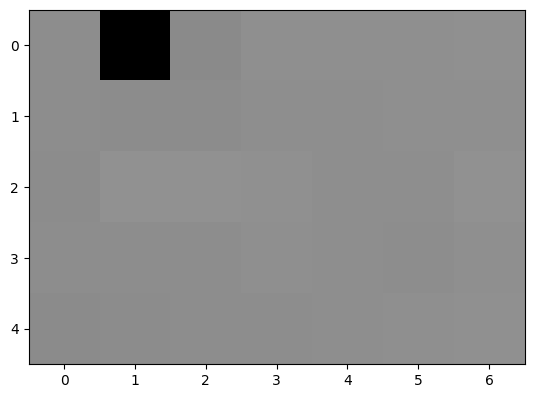

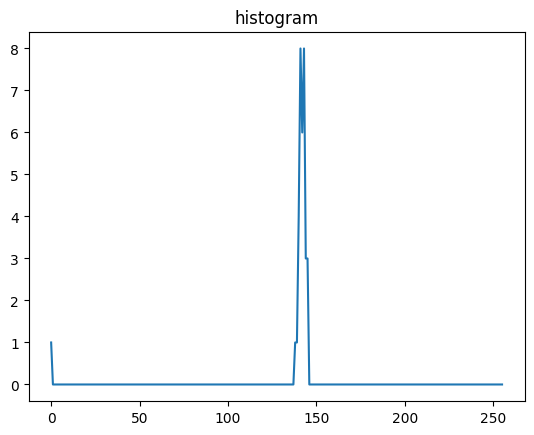

In [55]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [56]:
def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  min_val = min([min(row) for row in image])
  max_val = max([max(row) for row in image])

  for i in range(len(image)):
    for j in range(len(image[0])):
      output_image[i][j] = (image[i][j] - min_val) * 255 / (max_val - min_val)
  return output_image


Text(0.5, 1.0, 'stretched histogram')

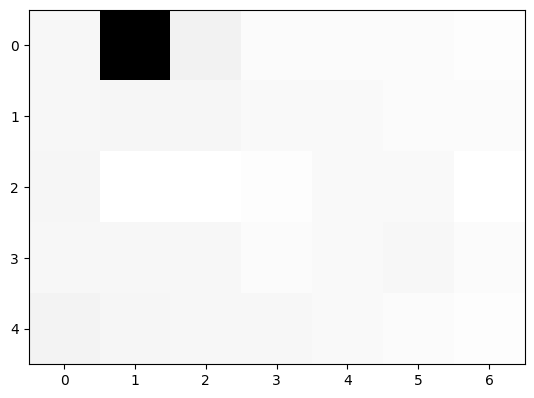

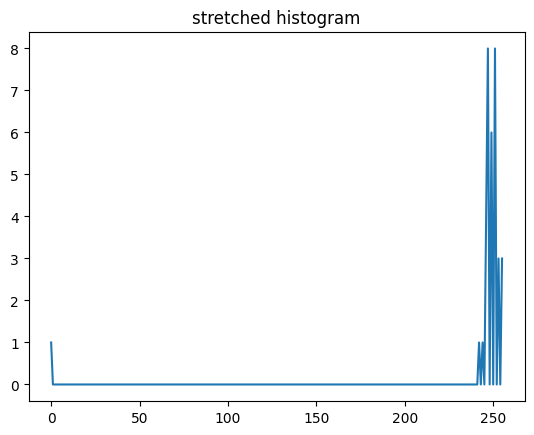

In [57]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('stretched histogram')

In [58]:
def clip_hist(image, min_value, max_value):
    '''
    Algorithm for histogram clipping without using libraries
    input(s):
      image (ndarray): input image
      min_value : minimum value to clip the histogram to
      max_value : maximum value to clip the histogram to
    output(s):
      output_image (ndarray): enhanced image with histogram clipping
    '''
    output_image = image.copy()      
    # Traverse all pixels of the input image
    for i in range(len(image)):
        for j in range(len(image[0])):
            # Clip pixel values below min_value to 0
            if image[i, j] < min_value:
                output_image[i, j] = 0
            # Clip pixel values above max_value to 255
            elif image[i, j] > max_value:
                output_image[i, j] = 255
            # Perform linear scaling for pixel values within the range
            else:
                output_image[i, j] = int((image[i, j] - min_value) / (max_value - min_value) * 255)
    
    # Return the resulting clipped image
    return output_image


Text(0.5, 1.0, 'clipped histogram')

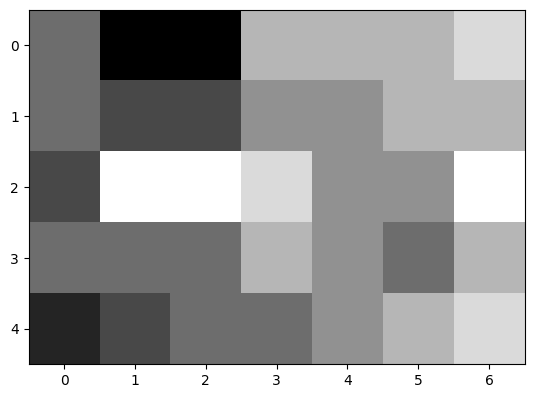

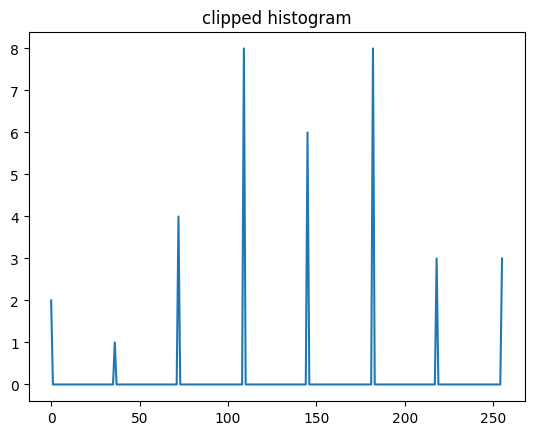

In [59]:
#dont change this cell
min_value = 138
max_value = 145
plt.imshow(clip_hist(image1,min_value, max_value),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image1,min_value, max_value)))
plt.title('clipped histogram')

# part3


Text(0.5, 1.0, 'Original Image')

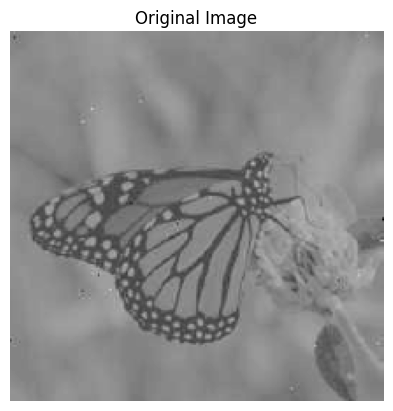

In [66]:
# first read the image and show it.(image2)
image2 = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

Text(0.5, 1.0, 'Stretched Image')

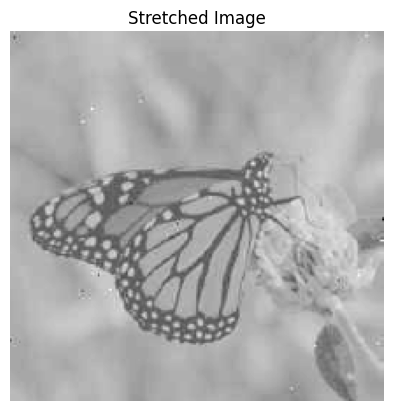

In [61]:
#use stretch_hist function to improve quality of the image and show it
plt.axis('off')
plt.imshow(stretch_hist(image2), cmap='gray', vmin=0, vmax=255)
plt.title('Stretched Image')


Text(0.5, 1.0, 'Clipped Image')

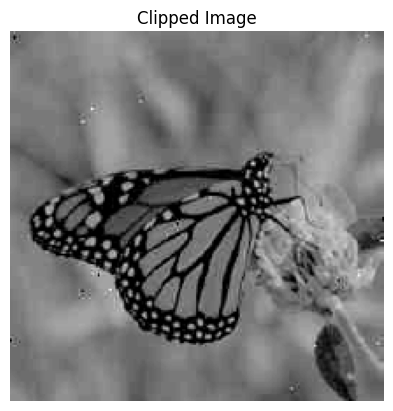

In [63]:
#use clip_hist function to improve quality of the image and show it
plt.axis('off')
plt.imshow(clip_hist(image2, 80, 230), cmap='gray')
plt.title('Clipped Image')